In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

# Walksat_First100_Uf50_P05_Tries100_Flips10000
df = pd.read_csv('Coloring_H0_Uf50_P05_Tries100_Flips10000.csv', na_values=['', 'NA', 'N/A']) # Coloring_H0_Uf50_P05_Tries100_Flips10000
headers = ['problem_name', 'time_to_solution', 'noise_param', 'tries', 'iterations', 'flips',
                'order_of_colors', 'order_of_parallel_flips']

In [3]:
print(df.head())
print(df.info())

   run_id problem_name  time_to_solution  noise_param  tries  iterations  \
0       1   uf5001.cnf          9.568410          0.5    0.0       284.0   
1       1   uf5002.cnf               NaN          NaN    NaN         NaN   
2       1   uf5003.cnf          2.907980          0.5    0.0        43.0   
3       1   uf5004.cnf         30.472374          0.5    0.0      1235.0   
4       1   uf5005.cnf          1.222945          0.5    0.0        11.0   

    flips                                    order_of_colors  \
0   457.0  [4, 7, 6, 6, 7, 0, 5, 1, 1, 1, 0, 2, 2, 0, 7, ...   
1     NaN                                                NaN   
2   101.0  [0, 7, 5, 1, 3, 2, 6, 1, 4, 2, 6, 10, 5, 3, 5,...   
3  1715.0  [4, 8, 5, 3, 3, 1, 4, 1, 4, 4, 7, 1, 2, 9, 3, ...   
4    33.0                  [3, 5, 4, 1, 0, 8, 3, 7, 4, 7, 8]   

                             order_of_parallel_flips  
0  [5, 6, 7, 4, 3, 4, 2, 3, 3, 2, 3, 3, 2, 3, 2, ...  
1                                               

In [35]:
print(df.groupby('problem_name')['flips'])

In [36]:
# Now what to plot:

# a Run length distribution
# b Success rate - modify below code with tinish def
# c Instance-wise flips to solution (done; just a number)
# d Batch wise flips to solution (done) - modify below code
# e Color choice distribution for the batch - take the per-instance and do for batch (most common)
# f Color choice during solving per instance (done above)
# g Color choice domain plots with instance-wise flips to solution range (combine e and c)
# h Parallelism % domain heuristic plots with instance-wise flips to solution range (needs new)

In [4]:
problem_counts = df['problem_name'].value_counts()
print([i for i in problem_counts if i != 100])

[]


In [8]:
df.loc[[1], ['problem_name','flips']]

,problem_name,flips
1,uf5002.cnf,NaN


In [38]:
min_flips = df.groupby('problem_name')['flips'].mean().reset_index()
min_flips_sorted = min_flips.sort_values(by='problem_name', ascending=True).reset_index(drop=True)

In [39]:
print(min_flips_sorted)

    problem_name        flips
0     uf5001.cnf   992.090000
1    uf50010.cnf   782.230000
2   uf500100.cnf  2140.333333
3    uf50011.cnf   745.330000
4    uf50012.cnf  1599.040000
..           ...          ...
95   uf50095.cnf  1847.400000
96   uf50096.cnf   123.380000
97   uf50097.cnf   339.750000
98   uf50098.cnf   399.920000
99   uf50099.cnf   506.940000

[100 rows x 2 columns]


In [40]:
# For RLD Distribution need to do the following
# Cumulative run length distribution
# x axis goes from 0 flips from 
# and margin goes from 0 to maxflips
# so basically, plot percentage of problems which are solved 
# given you allow for increasing values of max(flips)

min_flips = df.groupby('problem_name')['flips'].min().reset_index()
min_flips.rename(columns={'flips': 'min_flips'}, inplace=True)

In [41]:
import re
# regex pattern to jank the problem number to numerically sort the pandas dataframe
# since the way they handle string sorting gives me the ick
def extract_number(problem_name):
    match = re.search(r'uf(\d+)\.cnf', problem_name)
    if match:
        return int(match.group(1))
    else:
        return None
min_flips['problem_number'] = min_flips['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
min_flips_sorted = min_flips.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100 = min_flips_sorted.head(100)

In [42]:
plotting_first100

,problem_name,min_flips,problem_number
0,uf5001.cnf,43.0,5001
1,uf5002.cnf,65.0,5002
2,uf5003.cnf,23.0,5003
3,uf5004.cnf,64.0,5004
4,uf5005.cnf,18.0,5005
...,...,...,...
95,uf50096.cnf,10.0,50096
96,uf50097.cnf,21.0,50097
97,uf50098.cnf,26.0,50098
98,uf50099.cnf,27.0,50099


In [43]:
# Determine the range for the x-axis
max_flips = int(plotting_first100['min_flips'].max())
flip_range = np.arange(0, max_flips + 1)

# Initialize a list to store cumulative percentages
cumulative_percentages = []

# Total number of solved problems
total_problems = len(plotting_first100)

for flips in flip_range:
    # Number of problems with mean_flips <= current flips
    solved = plotting_first100[plotting_first100['min_flips'] <= flips].shape[0]
    # Calculate percentage
    percentage = (solved / total_problems) * 100
    cumulative_percentages.append(percentage)

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame({
    'Max Flips': flip_range,
    'Cumulative Percentage Solved': cumulative_percentages
})


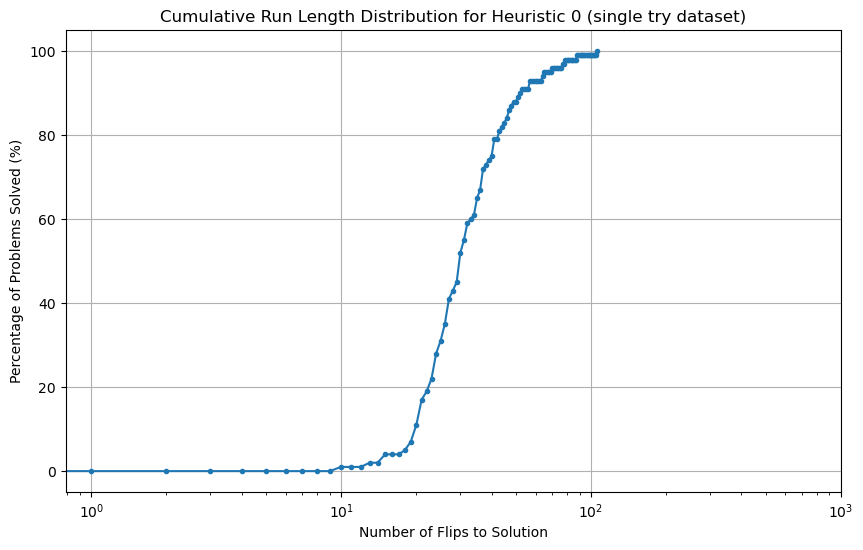

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_df['Max Flips'], cumulative_df['Cumulative Percentage Solved'], marker='.', linestyle='-')
plt.title('Cumulative Run Length Distribution for WalkSAT-SKC')
plt.xlabel('Number of Flips to Solution')
plt.ylabel('Percentage of Problems Solved (%)')
plt.grid(True)
plt.xscale('log')

max_power = int(np.ceil(np.log10(cumulative_df['Max Flips'].max()))) # power of 10 ticks
powers = [10**i for i in range(max_power + 1)]
plt.xticks(powers, [f'$10^{i}$' for i in range(max_power + 1)])

plt.show()

In [14]:
from pathlib import Path

directory = Path('/home/dae/SatExperiments/ColoringWalksatExperiments/uf50suiteSATLIB')

if not directory.is_dir():
    print(f"The directory '{directory}' does not exist.")
else:
    files = [f for f in directory.iterdir() if f.is_file()]
    num_files = len(files)
    print(f"Number of files in '{directory}': {num_files}")


Number of files in '/home/dae/SatExperiments/ColoringWalksatExperiments/uf50suiteSATLIB': 1001


In [15]:
df['iterations']

0        284.0
1          NaN
2         43.0
3       1235.0
4         11.0
         ...  
9995     149.0
9996     391.0
9997    3954.0
9998     684.0
9999       NaN
Name: iterations, Length: 10000, dtype: float64

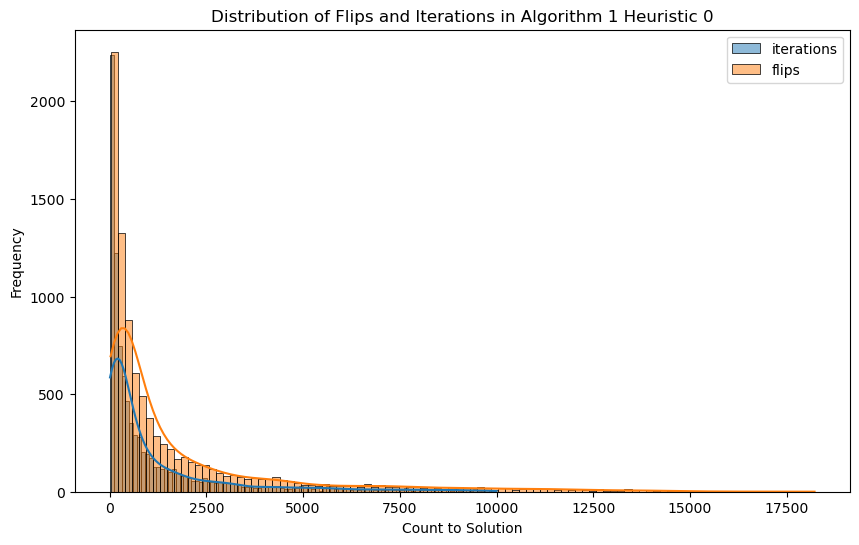

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['iterations'], bins=100, kde=True, label='iterations')
plt.title('Distribution of Flips and Iterations in Algorithm 1 Heuristic 0')
plt.xlabel('Count to Solution')
plt.ylabel('Frequency')
sns.histplot(df['flips'], bins=100, kde=True, label='flips')
plt.legend()
plt.show()


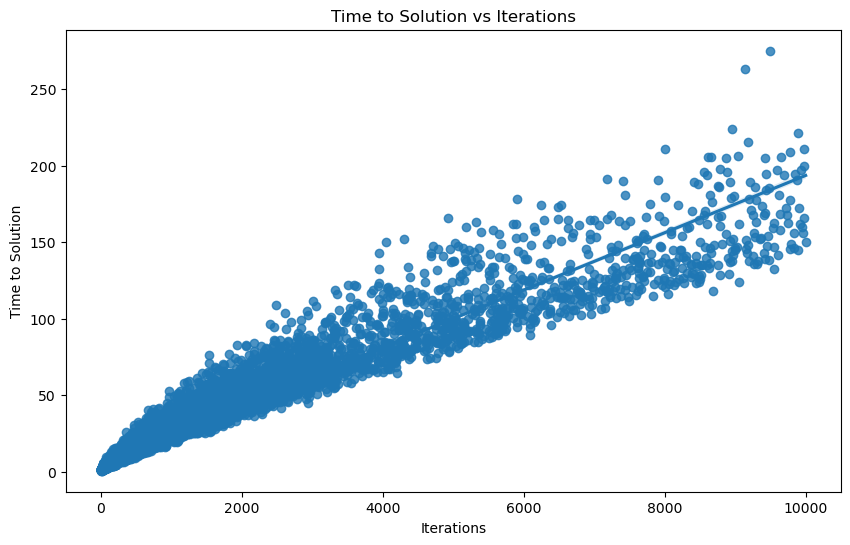

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='iterations', y='time_to_solution',order=1)
plt.title('Time to Solution vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Time to Solution')
plt.show()


In [18]:
import ast 

def parse_list_column(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return []

# Apply the function to the 'order_of_colors' column
df['order_of_colors'] = df['order_of_colors'].apply(parse_list_column)


In [19]:
df['tries']

0       0.0
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    NaN
Name: tries, Length: 10000, dtype: float64

In [20]:
df['success_rate'] = df['tries']/100

In [21]:
print(df['success_rate'])


0       0.0
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    NaN
Name: success_rate, Length: 10000, dtype: float64


In [22]:
from collections import Counter

# Flatten all color values into a single list
all_colors = [color for sublist in df['order_of_colors'] for color in sublist]

# Count frequency of each color
color_counts = Counter(all_colors)

# Convert to DataFrame for plotting
color_counts_df = pd.DataFrame.from_dict(color_counts, orient='index', columns=['count'])
color_counts_df.index.name = 'color'
color_counts_df.reset_index(inplace=True)

print(color_counts_df)

    color    count
0       4  1252743
1       7  1077857
2       6  1130000
3       0  1288960
4       5  1082530
5       1  1271734
6       2  1289921
7       8   877521
8       3  1307180
9      10    90877
10      9   397546
11     11     9809


In [23]:
# Function to extract transitions
def get_transitions(color_list):
    return list(zip(color_list, color_list[1000:]))

# Get all transitions
all_transitions = [transition for sublist in df['order_of_colors'] for transition in get_transitions(sublist)]

# Count frequency of each transition
transition_counts = Counter(all_transitions)

# Convert to DataFrame for plotting
transition_counts_df = pd.DataFrame(
    list(transition_counts.items()),
    columns=['transition', 'count']
)

# Split the transition tuple into separate columns
transition_counts_df[['from_color', 'to_color']] = pd.DataFrame(transition_counts_df['transition'].tolist(), index=transition_counts_df.index)
transition_counts_df.drop('transition', axis=1, inplace=True)

print(transition_counts_df.head())


   count  from_color  to_color
0  25640           4         9
1  56869           8         2
2  49270           5         8
3  56190           3         8
4  54544           1         8


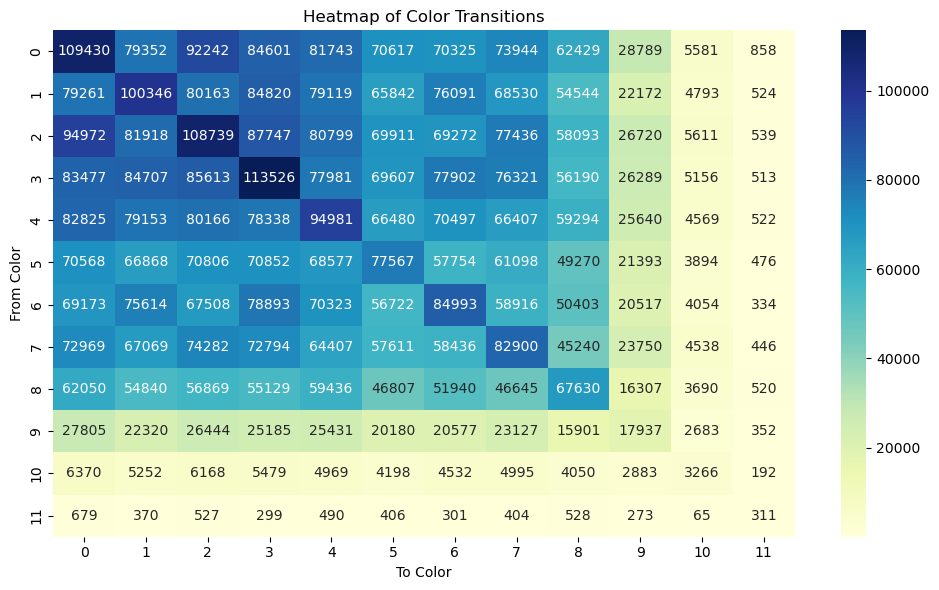

In [24]:
# Pivot the transition counts into a matrix
transition_pivot = transition_counts_df.pivot(index='from_color', columns='to_color', values='count').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(transition_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Color Transitions')
plt.xlabel('To Color')
plt.ylabel('From Color')
plt.tight_layout()
plt.show()


/tmp/ipykernel_2101221/3496345445.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='first_color', y='flips', errorbar='sd', palette='magma')


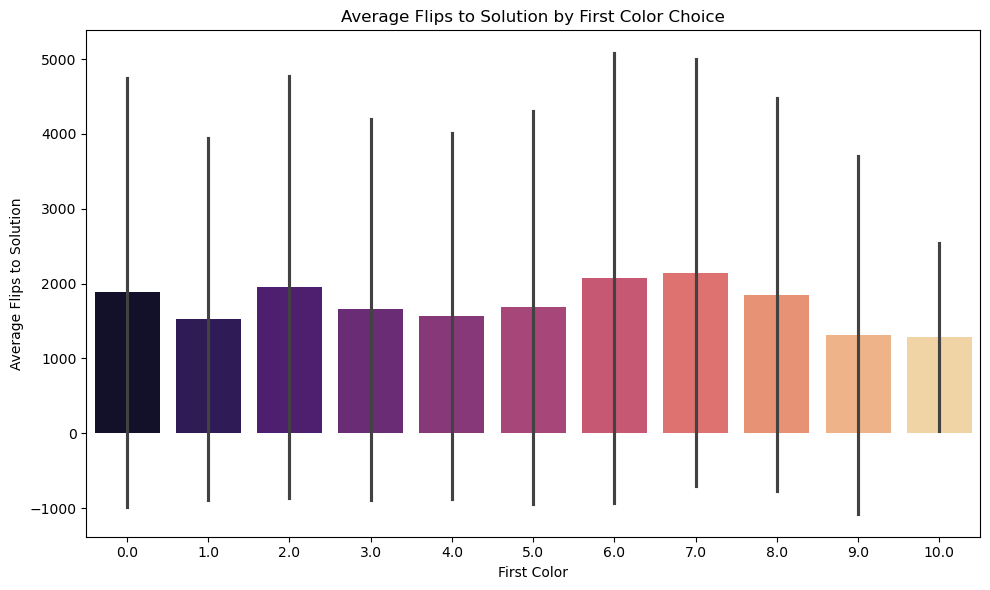

In [25]:
# QQ Check this!
df['first_color'] = df['order_of_colors'].apply(lambda x: x[0] if len(x) > 0 else None)

# Remove entries where first_color is None
filtered_df = df.dropna(subset=['first_color'])

plt.figure(figsize=(10,6))
sns.barplot(data=filtered_df, x='first_color', y='flips', errorbar='sd', palette='magma')
plt.title('Average Flips to Solution by First Color Choice')
plt.xlabel('First Color')
plt.ylabel('Average Flips to Solution')
plt.tight_layout()
plt.show()


/tmp/ipykernel_2101221/1793058132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_counts_df, x='color', y='count', palette='deep')


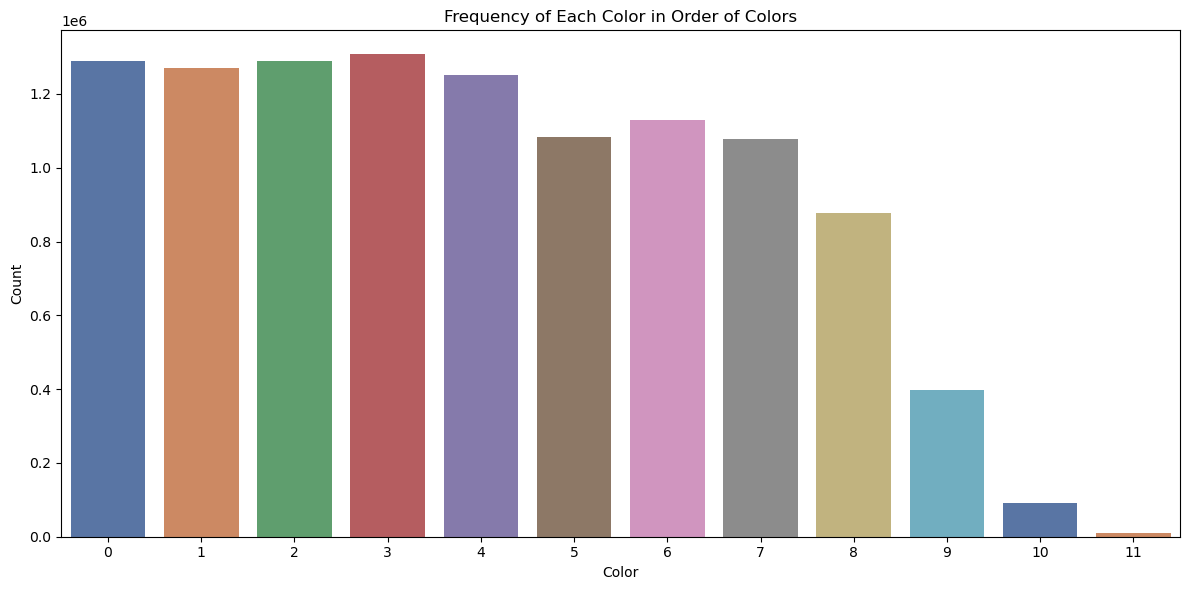

In [26]:
from collections import Counter

# Flatten all colors into a single list
all_colors = [color for sublist in df['order_of_colors'] for color in sublist]
color_counts = Counter(all_colors)
color_counts_df = pd.DataFrame.from_dict(color_counts, orient='index', columns=['count']).reset_index().rename(columns={'index': 'color'})
# Sort colors by frequency
color_counts_df = color_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=color_counts_df, x='color', y='count', palette='deep')
plt.title('Frequency of Each Color in Order of Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
